In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'RPALib'))

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
from epypes.compgraph import CompGraph, CompGraphRunner
from epypes.pipeline import Pipeline
from rpa.io import open_image

In [4]:
class CGFeaturesSIFT(CompGraph):

    def __init__(self, **sift_kvargs):

        self._sift = cv2.xfeatures2d.SIFT_create()

        func_dict = {
            'detect_keypoints': self._sift.detect,
            'compute_descriptors': self._sift.compute
        }

        func_io = {
            'detect_keypoints': ('image', 'keypoints'),
            'compute_descriptors': (('image', 'keypoints'), 'descriptors')
        }

        super(CGFeaturesSIFT, self).__init__(func_dict, func_io)

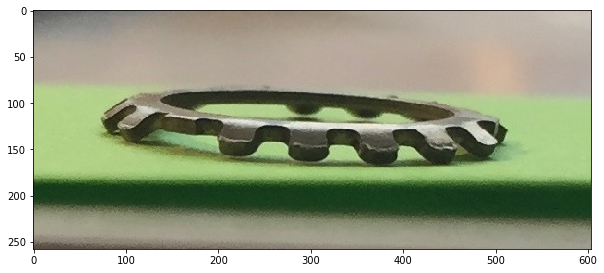

In [5]:
im = open_image(opj(CODE_DIR, 'DATA/IMG/sw_side/sw_side_green.jpg'), color_transform=cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 20))
plt.imshow(im)

In [6]:
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

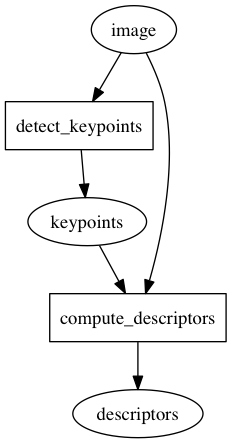

In [7]:
cg_sift = CGFeaturesSIFT()
nxpd.draw(cg_sift.to_networkx())

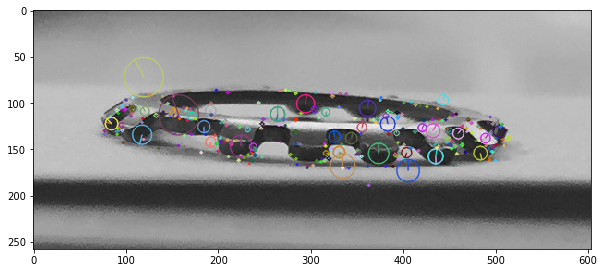

In [8]:
pipe_sift = Pipeline('SIFT', cg_sift)
pipe_sift.run(image=im_gray)
im_with_keypoints = cv2.drawKeypoints(im_gray, pipe_sift['keypoints'], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 20))
plt.imshow(im_with_keypoints)

In [9]:
pipe_sift.traverse_time()

('SIFT',
 0.06215023994445801,
 (('detect_keypoints', 0.032618045806884766),
  ('compute_descriptors', 0.02942490577697754)))